In [3]:
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!git reset --hard 68211f72c99915a15855f7b99bf5d93f5631330f

C:\Users\rishw\content\Smart-Refrigerator-A-Deep-Learning-based-Recipe-Recommendation-System\yolov5


Cloning into 'yolov5'...


HEAD is now at 68211f72 FROM nvcr.io/nvidia/pytorch:20.10-py3 (#1553)


In [2]:

#!pip install -qr requirements.txt  
import sys

import torch
from IPython.display import Image, clear_output
#from utils.google_utils import gdrive_download  

print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 2.2.1+cpu CPU


In [37]:

!curl -L "https://app.roboflow.com/ds/swYO7IuRBD?key=Jr8BLu5j85" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip


 extracting: train/labels/refrigerator-123_jpg.rf.c7de2624e4ebdfc108f4d5db24962a37.txt  
 extracting: train/labels/refrigerator-124_jpg.rf.02622e90de9484f6bff0e8e026cda6b3.txt  
 extracting: train/labels/refrigerator-124_jpg.rf.0b534d6634ea6918c00d4a15df1b40a1.txt  
 extracting: train/labels/refrigerator-124_jpg.rf.acca13b9eb841dd2a53f29955e190c34.txt  
 extracting: train/labels/refrigerator-126_jpg.rf.48eb158087f2210ab7e0c672f4c7d6b2.txt  
 extracting: train/labels/refrigerator-126_jpg.rf.5d62053a3449cd2ea6cb99866600cbc7.txt  
 extracting: train/labels/refrigerator-126_jpg.rf.7e8c4bf0d51ed57a36ab79ad8015d29f.txt  
 extracting: train/labels/refrigerator-128_jpg.rf.08c05ed55787d4c08aec773f709787b0.txt  
 extracting: train/labels/refrigerator-128_jpg.rf.63b16b7853c3a58a5302551619b7c052.txt  
 extracting: train/labels/refrigerator-128_jpg.rf.ffa1233335e39822c55cb4416b72c675.txt  
 extracting: train/labels/refrigerator-129_jpg.rf.4f6dd9e109f0373a562e30c3fbb1befe.txt  
 extracting: train/la

In [6]:
%cat /content/yolov5/models/yolov5s.yaml

# parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, BottleneckCSP, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, BottleneckCSP, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, BottleneckCSP, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, BottleneckCSP, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, BottleneckCSP, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-

In [7]:
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))


In [128]:
%%writetemplate models/custom_yolov5s.yaml

# parameters
nc: {num_classes}
depth_multiple: 0.33  
width_multiple: 0.50  

anchors:
  - [10,13, 16,30, 33,23] 
  - [30,61, 62,45, 59,119]  
  - [116,90, 156,198, 373,326] 

# YOLOv5 backbone
backbone:
  
  [[-1, 1, Focus, [64, 3]],  
   [-1, 1, Conv, [128, 3, 2]],  
   [-1, 3, BottleneckCSP, [128]],
   [-1, 1, Conv, [256, 3, 2]], 
   [-1, 9, BottleneckCSP, [256]],
   [-1, 1, Conv, [512, 3, 2]],  
   [-1, 9, BottleneckCSP, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, BottleneckCSP, [1024, False]], 
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],
   [-1, 3, BottleneckCSP, [512, False]], 

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  
   [-1, 3, BottleneckCSP, [256, False]],  

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]], 
   [-1, 3, BottleneckCSP, [512, False]],  

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  
   [-1, 3, BottleneckCSP, [1024, False]], 

   [[17, 20, 23], 1, Detect, [nc, anchors]], 
  ]

In [129]:
%%writefile utils/train.py
import argparse
import logging
import math
import os
import random
import time
from pathlib import Path
from warnings import warn

import numpy as np
import torch.distributed as dist
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler
import torch.utils.data
import yaml
from torch.cuda import amp
from torch.nn.parallel import DistributedDataParallel as DDP
from torch.utils.tensorboard import SummaryWriter
from tqdm import tqdm

import test  
from models.yolo import Model
from utils.autoanchor import check_anchors
from utils.datasets import create_dataloader
from utils.general import labels_to_class_weights, increment_path, labels_to_image_weights, init_seeds, \
    fitness, strip_optimizer, get_latest_run, check_dataset, check_file, check_git_status, check_img_size, \
    print_mutation, set_logging
from utils.google_utils import attempt_download
from utils.loss import compute_loss
from utils.plots import plot_images, plot_labels, plot_results, plot_evolution
from utils.torch_utils import ModelEMA, select_device, intersect_dicts, torch_distributed_zero_first

logger = logging.getLogger(__name__)

try:
    import wandb
except ImportError:
    wandb = None
    logger.info("Install Weights & Biases for experiment logging via 'pip install wandb' (recommended)")


def train(hyp, opt, device, tb_writer=None, wandb=None):
    logger.info(f'Hyperparameters {hyp}')
    save_dir, epochs, batch_size, total_batch_size, weights, rank = \
        Path(opt.save_dir), opt.epochs, opt.batch_size, opt.total_batch_size, opt.weights, opt.global_rank

    # Directories
    wdir = save_dir / 'weights'
    wdir.mkdir(parents=True, exist_ok=True)
    last = wdir / 'last.pt'
    best = wdir / 'best.pt'
    results_file = save_dir / 'results.txt'

    # Save run settings
    with open(save_dir / 'hyp.yaml', 'w') as f:
        yaml.dump(hyp, f, sort_keys=False)
    with open(save_dir / 'opt.yaml', 'w') as f:
        yaml.dump(vars(opt), f, sort_keys=False)

    # Configure
    plots = not opt.evolve 
    cuda = device.type != 'cpu'
    init_seeds(2 + rank)
    with open(opt.data) as f:
        data_dict = yaml.load(f, Loader=yaml.FullLoader)  
    with torch_distributed_zero_first(rank):
        check_dataset(data_dict)  
    train_path = data_dict['train']
    test_path = data_dict['val']
    nc, names = (1, ['item']) if opt.single_cls else (int(data_dict['nc']), data_dict['names'])  
    assert len(names) == nc, '%g names found for nc=%g dataset in %s' % (len(names), nc, opt.data)  

    # Model
    pretrained = weights.endswith('.pt')
    if pretrained:
        with torch_distributed_zero_first(rank):
            attempt_download(weights) 
        ckpt = torch.load(weights, map_location=device) 
        if hyp.get('anchors'):
            ckpt['model'].yaml['anchors'] = round(hyp['anchors'])  
        model = Model(opt.cfg or ckpt['model'].yaml, ch=3, nc=nc).to(device)  
        exclude = ['anchor'] if opt.cfg or hyp.get('anchors') else []  
        state_dict = ckpt['model'].float().state_dict()  
        state_dict = intersect_dicts(state_dict, model.state_dict(), exclude=exclude) 
        model.load_state_dict(state_dict, strict=False) 
        logger.info('Transferred %g/%g items from %s' % (len(state_dict), len(model.state_dict()), weights)) 
    else:
        model = Model(opt.cfg, ch=3, nc=nc).to(device)

    # Freeze
    freeze = []  
    for k, v in model.named_parameters():
        v.requires_grad = True 
        if any(x in k for x in freeze):
            print('freezing %s' % k)
            v.requires_grad = False

    # Optimizer
    nbs = 64  
    accumulate = max(round(nbs / total_batch_size), 1) 
    hyp['weight_decay'] *= total_batch_size * accumulate / nbs  

    pg0, pg1, pg2 = [], [], []  
    for k, v in model.named_modules():
        if hasattr(v, 'bias') and isinstance(v.bias, nn.Parameter):
            pg2.append(v.bias) 
        if isinstance(v, nn.BatchNorm2d):
            pg0.append(v.weight)  
        elif hasattr(v, 'weight') and isinstance(v.weight, nn.Parameter):
            pg1.append(v.weight) 
    if opt.adam:
        optimizer = optim.Adam(pg0, lr=hyp['lr0'], betas=(hyp['momentum'], 0.999))  
    else:
        optimizer = optim.SGD(pg0, lr=hyp['lr0'], momentum=hyp['momentum'], nesterov=True)

    optimizer.add_param_group({'params': pg1, 'weight_decay': hyp['weight_decay']})  
    optimizer.add_param_group({'params': pg2}) 
    logger.info('Optimizer groups: %g .bias, %g conv.weight, %g other' % (len(pg2), len(pg1), len(pg0)))
    del pg0, pg1, pg2

  
    lf = lambda x: ((1 + math.cos(x * math.pi / epochs)) / 2) * (1 - hyp['lrf']) + hyp['lrf'] 
    scheduler = lr_scheduler.LambdaLR(optimizer, lr_lambda=lf)
   
  
    if wandb and wandb.run is None:
        opt.hyp = hyp 
        wandb_run = wandb.init(config=opt, resume="allow",
                               project='YOLOv5' if opt.project == 'runs/train' else Path(opt.project).stem,
                               name=save_dir.stem,
                               id=ckpt.get('wandb_id') if 'ckpt' in locals() else None)


    start_epoch, best_fitness = 0, 0.0
    if pretrained:
        # Optimizer
        if ckpt['optimizer'] is not None:
            optimizer.load_state_dict(ckpt['optimizer'])
            best_fitness = ckpt['best_fitness']

        # Results
        if ckpt.get('training_results') is not None:
            with open(results_file, 'w') as file:
                file.write(ckpt['training_results'])  

        # Epochs
        start_epoch = ckpt['epoch'] + 1
        if opt.resume:
            assert start_epoch > 0, '%s training to %g epochs is finished, nothing to resume.' % (weights, epochs)
        if epochs < start_epoch:
            logger.info('%s has been trained for %g epochs. Fine-tuning for %g additional epochs.' %
                        (weights, ckpt['epoch'], epochs))
            epochs += ckpt['epoch']  

        del ckpt, state_dict

    # Image sizes
    gs = int(max(model.stride)) 
    imgsz, imgsz_test = [check_img_size(x, gs) for x in opt.img_size]  

    # DP mode
    if cuda and rank == -1 and torch.cuda.device_count() > 1:
        model = torch.nn.DataParallel(model)

    # SyncBatchNorm
    if opt.sync_bn and cuda and rank != -1:
        model = torch.nn.SyncBatchNorm.convert_sync_batchnorm(model).to(device)
        logger.info('Using SyncBatchNorm()')

    # EMA
    ema = ModelEMA(model) if rank in [-1, 0] else None

    # DDP mode
    if cuda and rank != -1:
        model = DDP(model, device_ids=[opt.local_rank], output_device=opt.local_rank)

    # Trainloader
    dataloader, dataset = create_dataloader(train_path, imgsz, batch_size, gs, opt,
                                            hyp=hyp, augment=True, cache=opt.cache_images, rect=opt.rect, rank=rank,
                                            world_size=opt.world_size, workers=opt.workers)
    mlc = np.concatenate(dataset.labels, 0)[:, 0].max() 
    nb = len(dataloader)  
    assert mlc < nc, 'Label class %g exceeds nc=%g in %s. Possible class labels are 0-%g' % (mlc, nc, opt.data, nc - 1)

    # Process 0
    if rank in [-1, 0]:
        ema.updates = start_epoch * nb // accumulate  
        testloader = create_dataloader(test_path, imgsz_test, total_batch_size, gs, opt,
                                       hyp=hyp, cache=opt.cache_images and not opt.notest, rect=True,
                                       rank=-1, world_size=opt.world_size, workers=opt.workers)[0] 

        if not opt.resume:
            labels = np.concatenate(dataset.labels, 0)
            c = torch.tensor(labels[:, 0]) 
            if plots:
                plot_labels(labels, save_dir=save_dir)
                if tb_writer:
                    tb_writer.add_histogram('classes', c, 0)
                if wandb:
                    wandb.log({"Labels": [wandb.Image(str(x), caption=x.name) for x in save_dir.glob('*labels*.png')]})

            # Anchors
            if not opt.noautoanchor:
                check_anchors(dataset, model=model, thr=hyp['anchor_t'], imgsz=imgsz)

    # Model parameters
    hyp['cls'] *= nc / 80.  
    model.nc = nc  
    model.hyp = hyp 
    model.gr = 1.0  
    model.class_weights = labels_to_class_weights(dataset.labels, nc).to(device)  
    model.names = names

    # Start training
    t0 = time.time()
    nw = max(round(hyp['warmup_epochs'] * nb), 1000)
    
    maps = np.zeros(nc) 
    results = (0, 0, 0, 0, 0, 0, 0)
    scheduler.last_epoch = start_epoch - 1  
    scaler = amp.GradScaler(enabled=cuda)
    logger.info('Image sizes %g train, %g test\n'
                'Using %g dataloader workers\nLogging results to %s\n'
                'Starting training for %g epochs...' % (imgsz, imgsz_test, dataloader.num_workers, save_dir, epochs))
    for epoch in range(start_epoch, epochs): -
        model.train()

        # Update image weights (optional)
        if opt.image_weights:
           
            if rank in [-1, 0]:
                cw = model.class_weights.cpu().numpy() * (1 - maps) ** 2  
                iw = labels_to_image_weights(dataset.labels, nc=nc, class_weights=cw)  
                dataset.indices = random.choices(range(dataset.n), weights=iw, k=dataset.n) 
         
            if rank != -1:
                indices = (torch.tensor(dataset.indices) if rank == 0 else torch.zeros(dataset.n)).int()
                dist.broadcast(indices, 0)
                if rank != 0:
                    dataset.indices = indices.cpu().numpy()

      
        mloss = torch.zeros(4, device=device)  
        if rank != -1:
            dataloader.sampler.set_epoch(epoch)
        pbar = enumerate(dataloader)
        logger.info(('\n' + '%10s' * 8) % ('Epoch', 'gpu_mem', 'box', 'obj', 'cls', 'total', 'targets', 'img_size'))
        if rank in [-1, 0]:
            pbar = tqdm(pbar, total=nb) 
        optimizer.zero_grad()
        for i, (imgs, targets, paths, _) in pbar: -------------------------------------------------------------
            ni = i + nb * epoch  
            imgs = imgs.to(device, non_blocking=True).float() / 255.0  

            # Warmup
            if ni <= nw:
                xi = [0, nw]  
                accumulate = max(1, np.interp(ni, xi, [1, nbs / total_batch_size]).round())
                for j, x in enumerate(optimizer.param_groups):
                 
                    x['lr'] = np.interp(ni, xi, [hyp['warmup_bias_lr'] if j == 2 else 0.0, x['initial_lr'] * lf(epoch)])
                    if 'momentum' in x:
                        x['momentum'] = np.interp(ni, xi, [hyp['warmup_momentum'], hyp['momentum']])

            # Multi-scale
            if opt.multi_scale:
                sz = random.randrange(imgsz * 0.5, imgsz * 1.5 + gs) // gs * gs 
                sf = sz / max(imgs.shape[2:]) 
                if sf != 1:
                    ns = [math.ceil(x * sf / gs) * gs for x in imgs.shape[2:]] 
                    imgs = F.interpolate(imgs, size=ns, mode='bilinear', align_corners=False)

            # Forward
            with amp.autocast(enabled=cuda):
                pred = model(imgs) 
                loss, loss_items = compute_loss(pred, targets.to(device), model)  
                if rank != -1:
                    loss *= opt.world_size 

            # Backward
            scaler.scale(loss).backward()

            # Optimize
            if ni % accumulate == 0:
                scaler.step(optimizer) 
                scaler.update()
                optimizer.zero_grad()
                if ema:
                    ema.update(model)

            # Print
            if rank in [-1, 0]:
                mloss = (mloss * i + loss_items) / (i + 1)  
                mem = '%.3gG' % (torch.cuda.memory_reserved() / 1E9 if torch.cuda.is_available() else 0)  
                s = ('%10s' * 2 + '%10.4g' * 6) % (
                    '%g/%g' % (epoch, epochs - 1), mem, *mloss, targets.shape[0], imgs.shape[-1])
                pbar.set_description(s)

                # Plot
                if plots and ni < 3:
                    f = save_dir / f'train_batch{ni}.jpg' 
                    plot_images(images=imgs, targets=targets, paths=paths, fname=f)
                  
                elif plots and ni == 3 and wandb:
                    wandb.log({"Mosaics": [wandb.Image(str(x), caption=x.name) for x in save_dir.glob('train*.jpg')]})

     
        # Scheduler
        lr = [x['lr'] for x in optimizer.param_groups] 
        scheduler.step()

        # DDP process 0 or single-GPU
        if rank in [-1, 0]:
            # mAP
            if ema:
                ema.update_attr(model, include=['yaml', 'nc', 'hyp', 'gr', 'names', 'stride'])
            final_epoch = epoch + 1 == epochs
            if not opt.notest or final_epoch:  
                results, maps, times = test.test(opt.data,
                                                 batch_size=total_batch_size,
                                                 imgsz=imgsz_test,
                                                 model=ema.ema,
                                                 single_cls=opt.single_cls,
                                                 dataloader=testloader,
                                                 save_dir=save_dir,
                                                 plots=plots and final_epoch,
                                                 log_imgs=opt.log_imgs if wandb else 0)

            # Write
            with open(results_file, 'a') as f:
                f.write(s + '%10.4g' * 7 % results + '\n')  
            if len(opt.name) and opt.bucket:
                os.system('gsutil cp %s gs://%s/results/results%s.txt' % (results_file, opt.bucket, opt.name))

            # Log
            tags = ['train/box_loss', 'train/obj_loss', 'train/cls_loss',  
                    'metrics/precision', 'metrics/recall', 'metrics/mAP_0.5', 'metrics/mAP_0.5:0.95',
                    'val/box_loss', 'val/obj_loss', 'val/cls_loss',
                    'x/lr0', 'x/lr1', 'x/lr2']  
            for x, tag in zip(list(mloss[:-1]) + list(results) + lr, tags):
                if tb_writer:
                    tb_writer.add_scalar(tag, x, epoch) 
                if wandb:
                    wandb.log({tag: x})  

            # Update best mAP
            fi = fitness(np.array(results).reshape(1, -1))
            if fi > best_fitness:
                best_fitness = fi

            # Save model
            save = (not opt.nosave) or (final_epoch and not opt.evolve)
            if save:
                with open(results_file, 'r') as f: 
                    ckpt = {'epoch': epoch,
                            'best_fitness': best_fitness,
                            'training_results': f.read(),
                            'model': ema.ema,
                            'optimizer': None if final_epoch else optimizer.state_dict(),
                            'wandb_id': wandb_run.id if wandb else None}

                # Save last, best and delete
                torch.save(ckpt, last)
                if best_fitness == fi:
                    torch.save(ckpt, best)
                del ckpt
    
    if rank in [-1, 0]:
        # Strip optimizers
        n = opt.name if opt.name.isnumeric() else ''
        fresults, flast, fbest = save_dir / f'results{n}.txt', wdir / f'last{n}.pt', wdir / f'best{n}.pt'
        for f1, f2 in zip([wdir / 'last.pt', wdir / 'best.pt', results_file], [flast, fbest, fresults]):
            if f1.exists():
                os.rename(f1, f2)  
                if str(f2).endswith('.pt'):  
                    strip_optimizer(f2)  
                    os.system('gsutil cp %s gs://%s/weights' % (f2, opt.bucket)) if opt.bucket else None 
        if plots:
            plot_results(save_dir=save_dir)  
            if wandb:
                files = ['results.png', 'precision_recall_curve.png', 'confusion_matrix.png']
                wandb.log({"Results": [wandb.Image(str(save_dir / f), caption=f) for f in files
                                       if (save_dir / f).exists()]})
        logger.info('%g epochs completed in %.3f hours.\n' % (epoch - start_epoch + 1, (time.time() - t0) / 3600))
    else:
        dist.destroy_process_group()

    wandb.run.finish() if wandb and wandb.run else None
    torch.cuda.empty_cache()
    return results


if __name__ == '__main__':
    parser = argparse.ArgumentParser()
    parser.add_argument('--weights', type=str, default='yolov5s.pt', help='initial weights path')
    parser.add_argument('--cfg', type=str, default='', help='model.yaml path')
    parser.add_argument('--data', type=str, default='data/coco128.yaml', help='data.yaml path')
    parser.add_argument('--hyp', type=str, default='data/hyp.scratch.yaml', help='hyperparameters path')
    parser.add_argument('--epochs', type=int, default=300)
    parser.add_argument('--batch-size', type=int, default=16, help='total batch size for all GPUs')
    parser.add_argument('--img-size', nargs='+', type=int, default=[640, 640], help='[train, test] image sizes')
    parser.add_argument('--rect', action='store_true', help='rectangular training')
    parser.add_argument('--resume', nargs='?', const=True, default=False, help='resume most recent training')
    parser.add_argument('--nosave', action='store_true', help='only save final checkpoint')
    parser.add_argument('--notest', action='store_true', help='only test final epoch')
    parser.add_argument('--noautoanchor', action='store_true', help='disable autoanchor check')
    parser.add_argument('--evolve', action='store_true', help='evolve hyperparameters')
    parser.add_argument('--bucket', type=str, default='', help='gsutil bucket')
    parser.add_argument('--cache-images', action='store_true', help='cache images for faster training')
    parser.add_argument('--image-weights', action='store_true', help='use weighted image selection for training')
    parser.add_argument('--device', default='', help='cuda device, i.e. 0 or 0,1,2,3 or cpu')
    parser.add_argument('--multi-scale', action='store_true', help='vary img-size +/- 50%%')
    parser.add_argument('--single-cls', action='store_true', help='train as single-class dataset')
    parser.add_argument('--adam', action='store_true', help='use torch.optim.Adam() optimizer')
    parser.add_argument('--sync-bn', action='store_true', help='use SyncBatchNorm, only available in DDP mode')
    parser.add_argument('--local_rank', type=int, default=-1, help='DDP parameter, do not modify')
    parser.add_argument('--log-imgs', type=int, default=16, help='number of images for W&B logging, max 100')
    parser.add_argument('--workers', type=int, default=8, help='maximum number of dataloader workers')
    parser.add_argument('--project', default='runs/train', help='save to project/name')
    parser.add_argument('--name', default='exp', help='save to project/name')
    parser.add_argument('--exist-ok', action='store_true', help='existing project/name ok, do not increment')
    opt = parser.parse_args()

    # Set DDP variables
    opt.total_batch_size = opt.batch_size
    opt.world_size = int(os.environ['WORLD_SIZE']) if 'WORLD_SIZE' in os.environ else 1
    opt.global_rank = int(os.environ['RANK']) if 'RANK' in os.environ else -1
    set_logging(opt.global_rank)
    if opt.global_rank in [-1, 0]:
        check_git_status()

    # Resume
    if opt.resume:  
        ckpt = opt.resume if isinstance(opt.resume, str) else get_latest_run() 
        assert os.path.isfile(ckpt), 'ERROR: --resume checkpoint does not exist'
        with open(Path(ckpt).parent.parent / 'opt.yaml') as f:
            opt = argparse.Namespace(**yaml.load(f, Loader=yaml.FullLoader)) 
        opt.cfg, opt.weights, opt.resume = '', ckpt, True
        logger.info('Resuming training from %s' % ckpt)
    else:
     
        opt.data, opt.cfg, opt.hyp = check_file(opt.data), check_file(opt.cfg), check_file(opt.hyp) 
        assert len(opt.cfg) or len(opt.weights), 'either --cfg or --weights must be specified'
        opt.img_size.extend([opt.img_size[-1]] * (2 - len(opt.img_size)))  
        opt.name = 'evolve' if opt.evolve else opt.name
        opt.save_dir = increment_path(Path(opt.project) / opt.name, exist_ok=opt.exist_ok | opt.evolve)  

    # DDP mode
    device = select_device(opt.device, batch_size=opt.batch_size)
    if opt.local_rank != -1:
        assert torch.cuda.device_count() > opt.local_rank
        torch.cuda.set_device(opt.local_rank)
        device = torch.device('cuda', opt.local_rank)
        dist.init_process_group(backend='nccl', init_method='env://')  
        assert opt.batch_size % opt.world_size == 0, '--batch-size must be multiple of CUDA device count'
        opt.batch_size = opt.total_batch_size // opt.world_size

    # Hyperparameters
    with open(opt.hyp) as f:
        hyp = yaml.load(f, Loader=yaml.FullLoader)  
        if 'box' not in hyp:
            warn('Compatibility: %s missing "box" which was renamed from "giou" in %s' %
                 (opt.hyp, 'https://github.com/ultralytics/yolov5/pull/1120'))
            hyp['box'] = hyp.pop('giou')

    # Train
    logger.info(opt)
    if not opt.evolve:
        tb_writer = None  
        if opt.global_rank in [-1, 0]:
            logger.info(f'Start Tensorboard with "tensorboard --logdir {opt.project}", view at http://localhost:6006/')
            tb_writer = SummaryWriter(opt.save_dir) 
        train(hyp, opt, device, tb_writer, wandb)

    # Evolve hyperparameters (optional)
    else:

        meta = {'lr0': (1, 1e-5, 1e-1),  
                'lrf': (1, 0.01, 1.0),  
                'momentum': (0.3, 0.6, 0.98),  
                'weight_decay': (1, 0.0, 0.001),  
                'warmup_epochs': (1, 0.0, 5.0),  
                'warmup_momentum': (1, 0.0, 0.95),  
                'warmup_bias_lr': (1, 0.0, 0.2),
                'box': (1, 0.02, 0.2),  
                'cls': (1, 0.2, 4.0),  
                'cls_pw': (1, 0.5, 2.0), 
                'obj': (1, 0.2, 4.0),  
                'obj_pw': (1, 0.5, 2.0),  
                'iou_t': (0, 0.1, 0.7),
                'anchor_t': (1, 2.0, 8.0),  
                'anchors': (2, 2.0, 10.0),  
                'fl_gamma': (0, 0.0, 2.0),  
                'hsv_h': (1, 0.0, 0.1),  
                'hsv_s': (1, 0.0, 0.9),  
                'hsv_v': (1, 0.0, 0.9),  
                'degrees': (1, 0.0, 45.0),
                'translate': (1, 0.0, 0.9),  
                'scale': (1, 0.0, 0.9),  
                'shear': (1, 0.0, 10.0), 
                'perspective': (0, 0.0, 0.001),  
                'flipud': (1, 0.0, 1.0),  
                'fliplr': (0, 0.0, 1.0),  
                'mosaic': (1, 0.0, 1.0),  
                'mixup': (1, 0.0, 1.0)}  

        assert opt.local_rank == -1, 'DDP mode not implemented for --evolve'
        opt.notest, opt.nosave = True, True  
     
        yaml_file = Path(opt.save_dir) / 'hyp_evolved.yaml'  
        if opt.bucket:
            os.system('gsutil cp gs://%s/evolve.txt .' % opt.bucket) 

        for _ in range(300): 
            if Path('evolve.txt').exists(): 
                # Select parent(s)
                parent = 'single' 
                x = np.loadtxt('evolve.txt', ndmin=2)
                n = min(5, len(x))  
                x = x[np.argsort(-fitness(x))][:n] 
                w = fitness(x) - fitness(x).min()  
                if parent == 'single' or len(x) == 1:
                    
                    x = x[random.choices(range(n), weights=w)[0]]  
                elif parent == 'weighted':
                    x = (x * w.reshape(n, 1)).sum(0) / w.sum() 

                # Mutate
                mp, s = 0.8, 0.2  
                npr = np.random
                npr.seed(int(time.time()))
                g = np.array([x[0] for x in meta.values()])  
                ng = len(meta)
                v = np.ones(ng)
                while all(v == 1):  
                    v = (g * (npr.random(ng) < mp) * npr.randn(ng) * npr.random() * s + 1).clip(0.3, 3.0)
                for i, k in enumerate(hyp.keys()):  
                    hyp[k] = float(x[i + 7] * v[i])  

            # Constrain to limits
            for k, v in meta.items():
                hyp[k] = max(hyp[k], v[1])  
                hyp[k] = min(hyp[k], v[2]) 
                hyp[k] = round(hyp[k], 5) 

            # Train mutation
            results = train(hyp.copy(), opt, device, wandb=wandb)

            # Write mutation results
            print_mutation(hyp.copy(), results, yaml_file, opt.bucket)

        # Plot results
        plot_evolution(yaml_file)
        print(f'Hyperparameter evolution complete. Best results saved as: {yaml_file}\n'
              f'Command to train a new model with these hyperparameters: $ python train.py --hyp {yaml_file}')


Writing utils/train.py


In [133]:
!python train.py --data ./data/coco128.yaml --weights '' --cfg ./models/yolov5s.yaml --img 640

2024-03-07 09:15:53.532667: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=, cfg=./models/yolov5s.yaml, data=./data/coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
Command 'git fetch origin' timed out after 5 seconds
YOLOv5 🚀 v7.0-290-gb2ffe055 Python-3.9.17 torch-

In [5]:
!python train.py --img 416 --batch 16 --epochs 30 --data ../data.yaml --cfg ./models/custom_yolov5s.yaml --weights ./runs/train/yolov5s_results8/weights/best.pt --name yolov5s_results  --cache

github: skipping check (not a git repository), for updates see https://github.com/ultralytics/yolov5


train: weights=./runs/train/yolov5s_results8/weights/best.pt, cfg=./models/custom_yolov5s.yaml, data=../data.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=30, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=yolov5s_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
YOLOv5  2024-3-7 Python-3.12.3 torch-2.2.1+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2,

GROUND TRUTH TRAINING DATA:


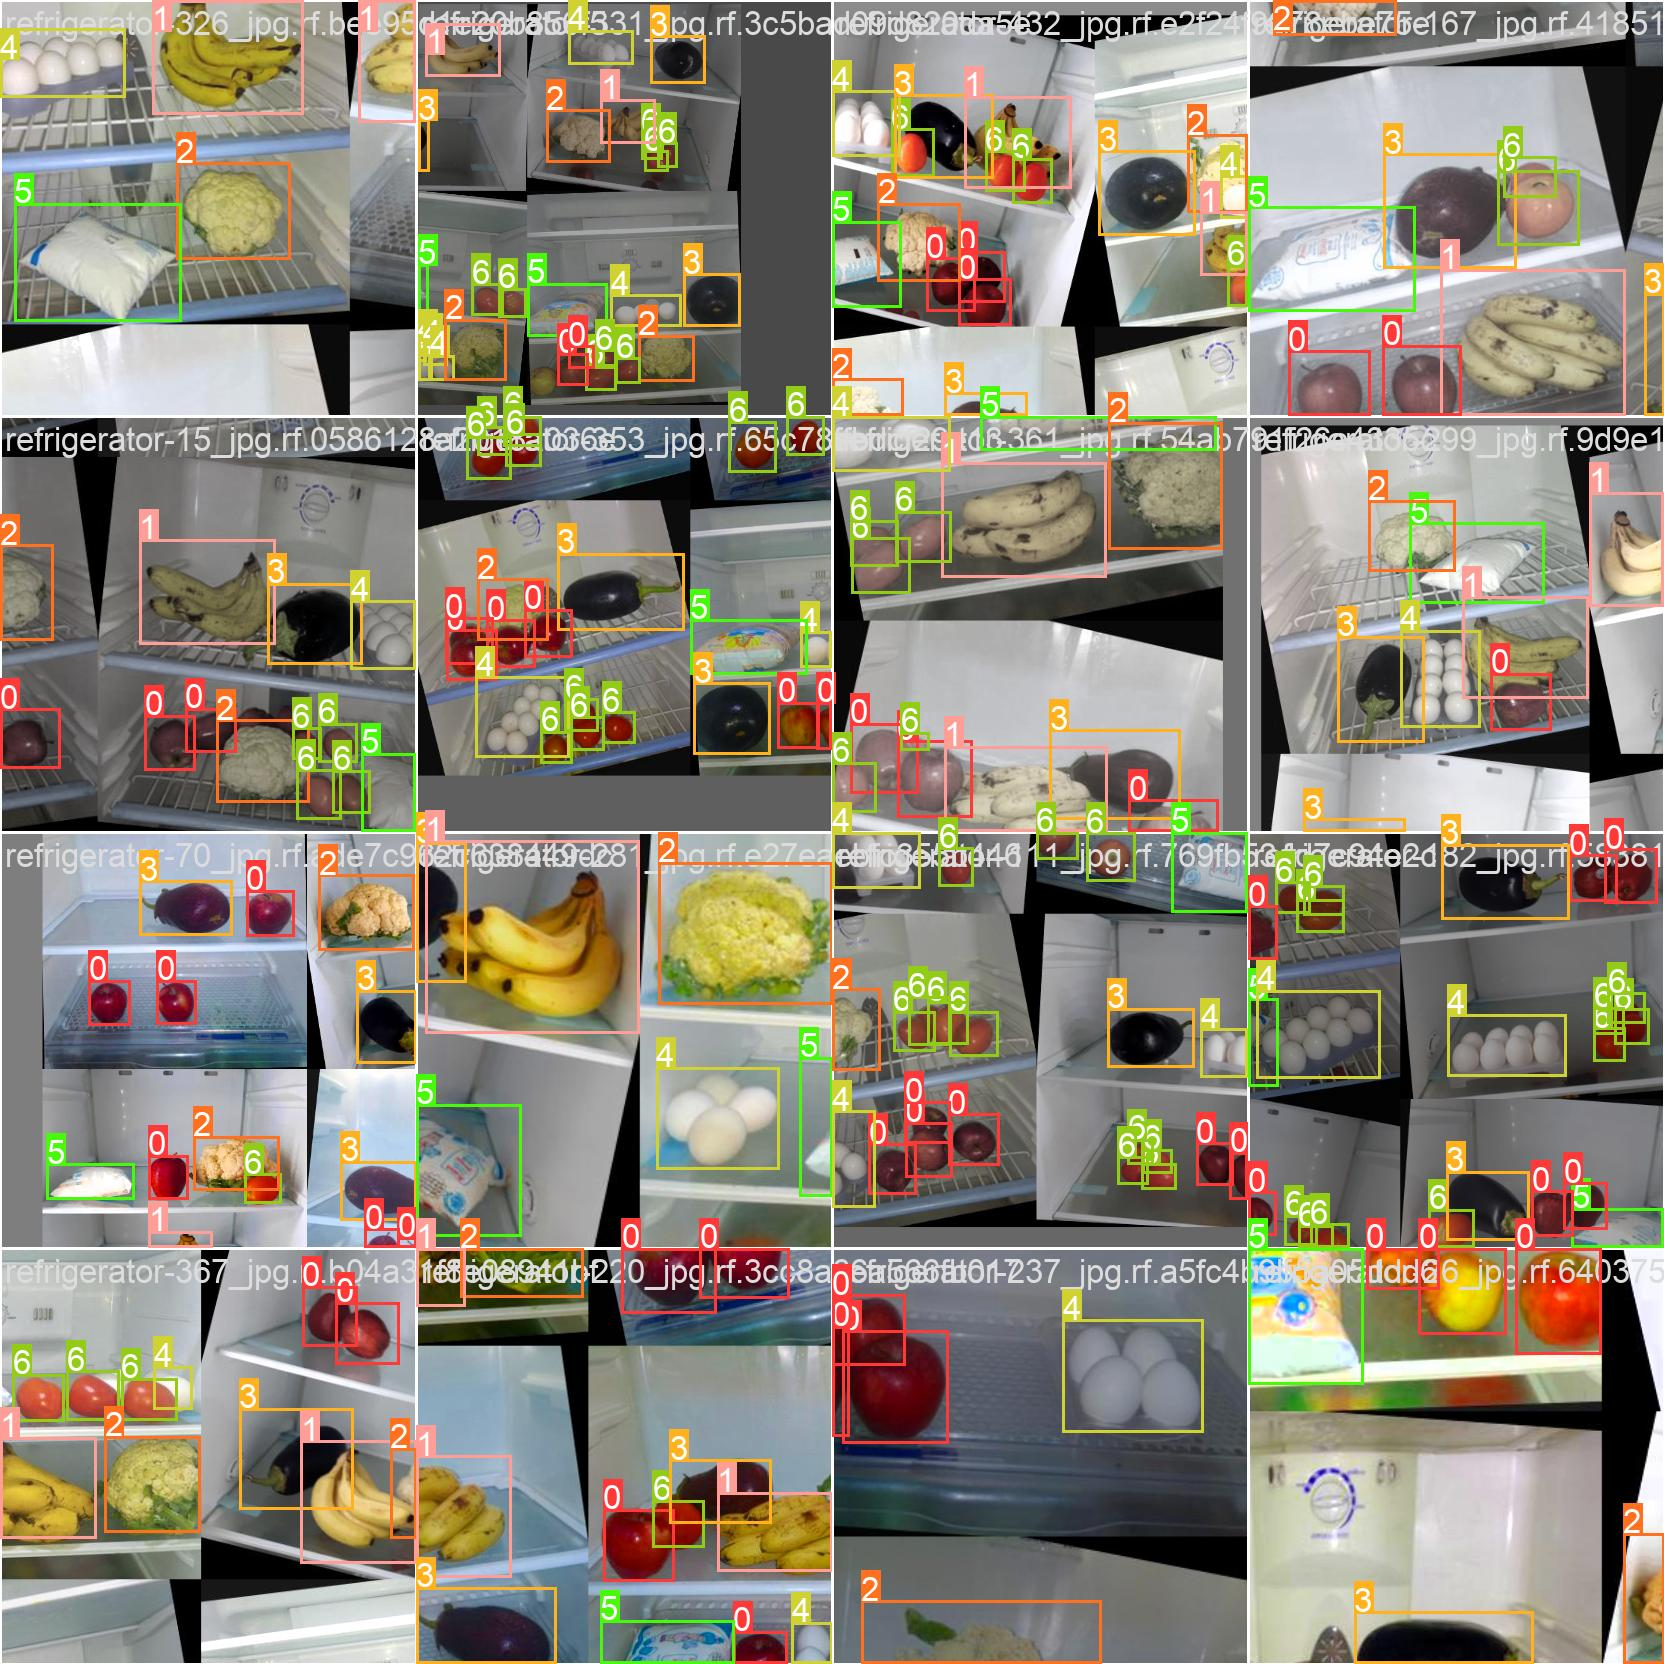

In [16]:
print("GROUND TRUTH TRAINING DATA:")
Image(filename='runs/train/yolov5s_results3/train_batch0.jpg', width=900)

In [9]:
#%cd /content/yolov5/
!python detect.py --weights runs/train/yolov5s_results3/weights/best.pt --img 416 --conf 0.4 --source ../test/images

detect: weights=['runs/train/yolov5s_results3/weights/best.pt'], source=../test/images, data=data\coco128.yaml, imgsz=[416, 416], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  2024-3-7 Python-3.12.2 torch-2.2.1+cpu CPU

Fusing layers... 
custom_YOLOv5s summary: 182 layers, 7262700 parameters, 0 gradients
image 1/42 C:\Users\rishw\content\test\images\refrigerator-103_jpg.rf.12f6efb49077b332137238021f27b972.jpg: 416x416 4 apples, 1 banana, 1 eggplant, 1 milk, 123.3ms
image 2/42 C:\Users\rishw\content\test\images\refrigerator-133_jpg.rf.a7559fecef1bd36d4e7c9b8eca387597.jpg: 416x416 3 apples, 1 banana, 1 milk, 3 tomatos, 121.5ms
image 3/42 C:\Users\rishw\content\tes

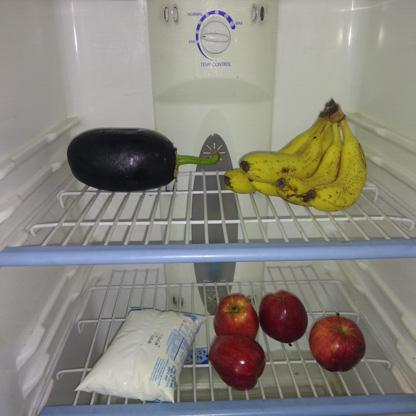

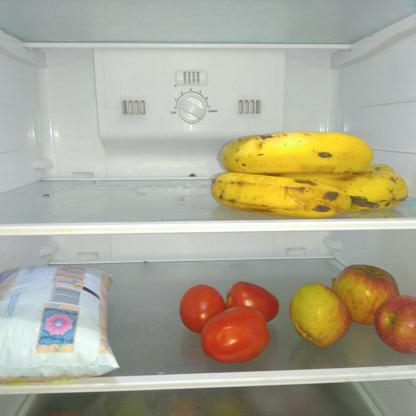

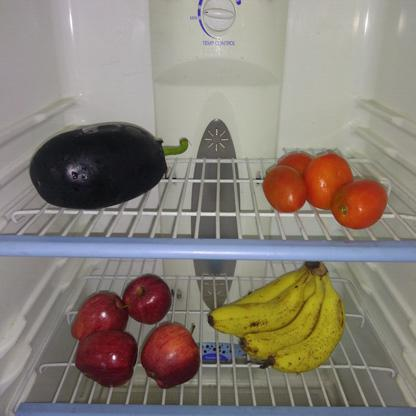

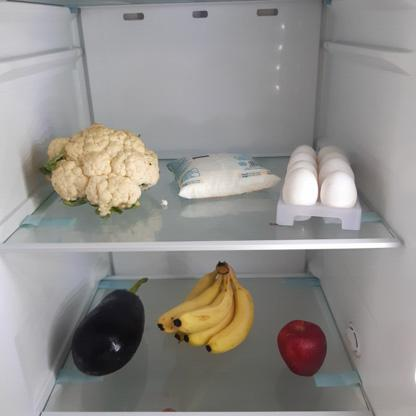

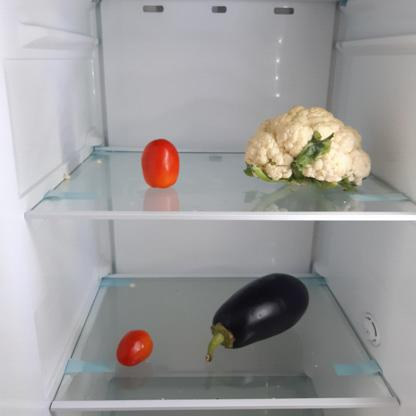

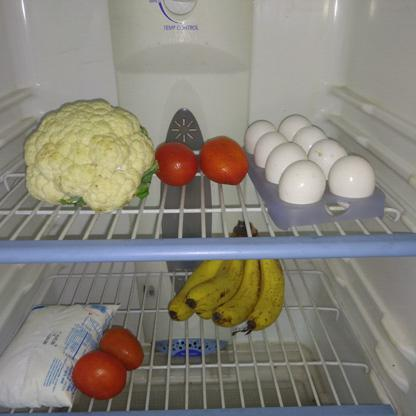

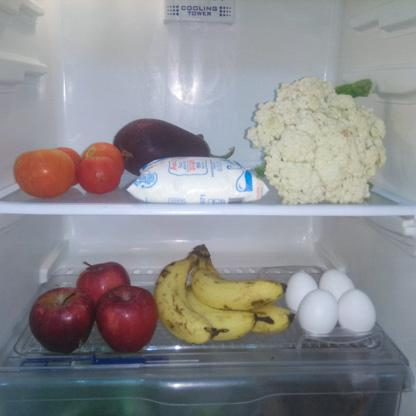

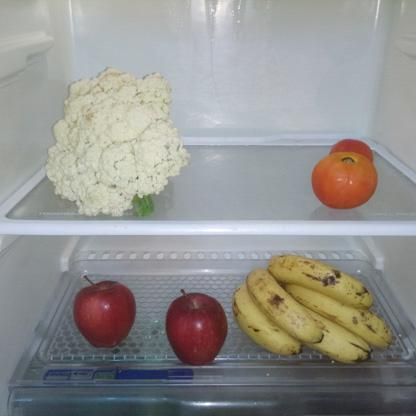

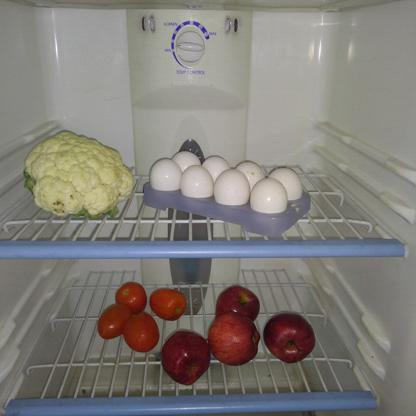

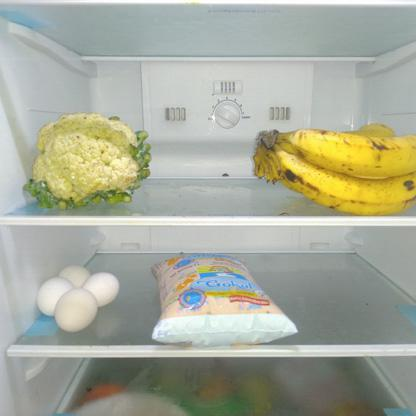

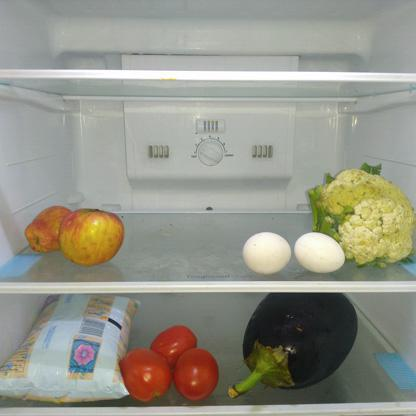

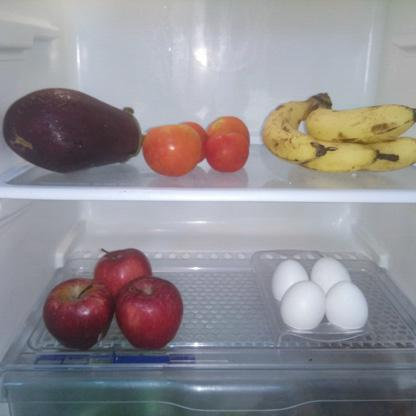

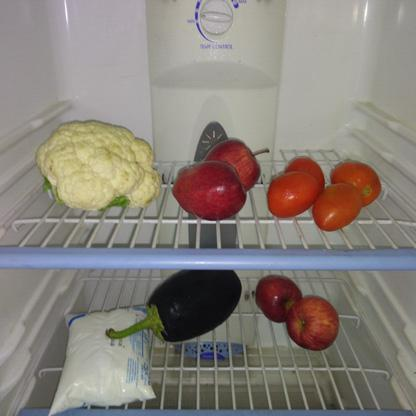

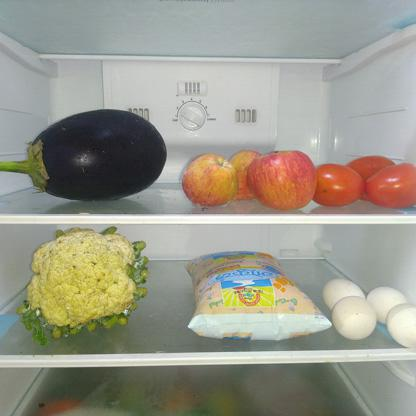

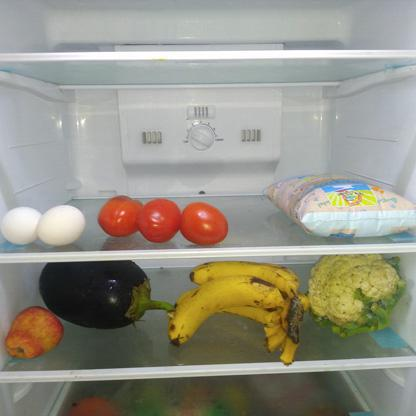

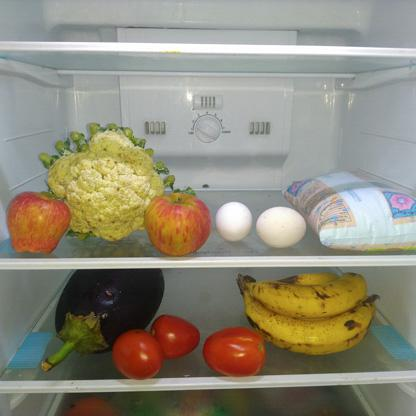

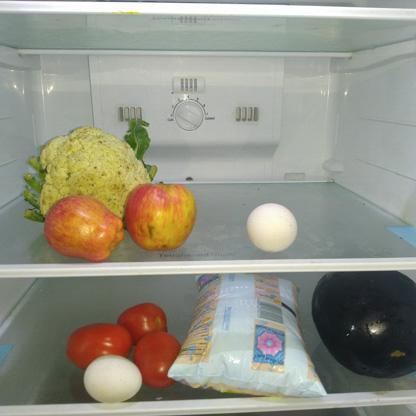

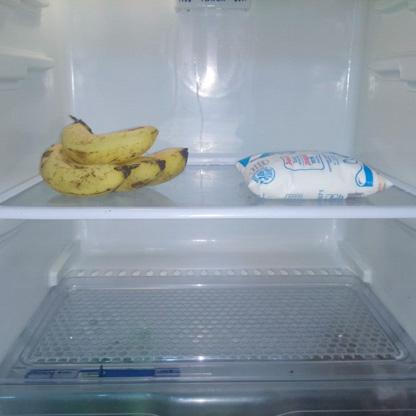

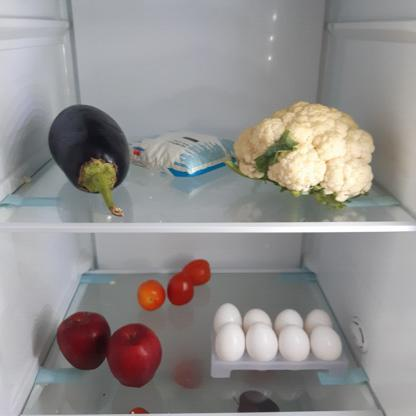

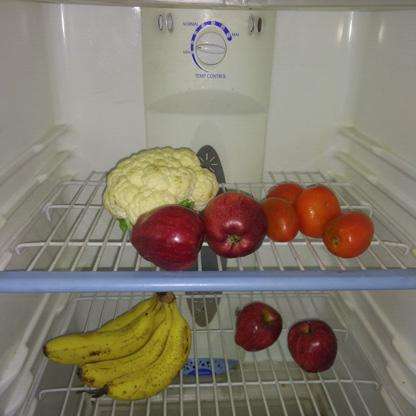

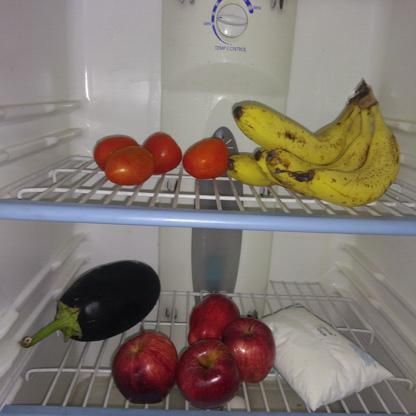

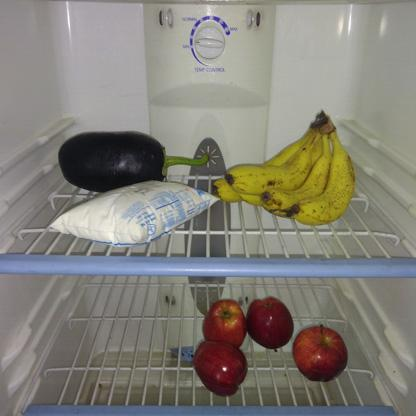

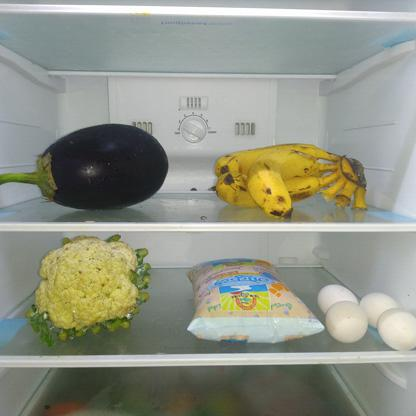

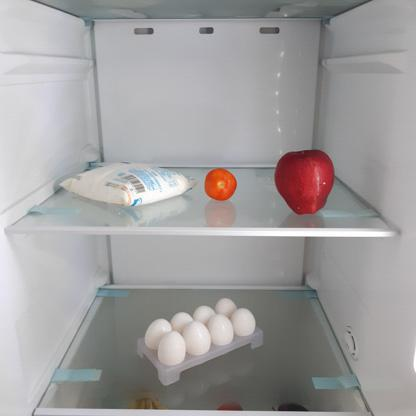

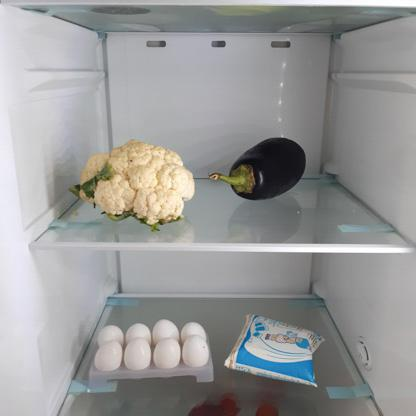

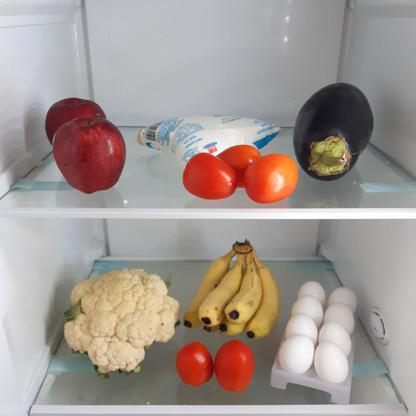

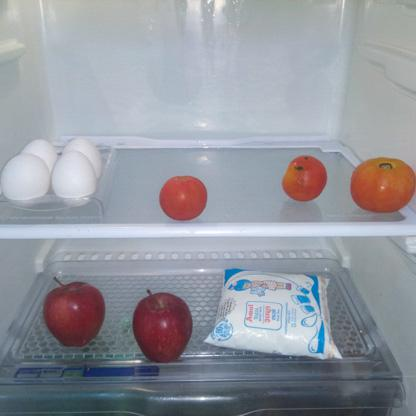

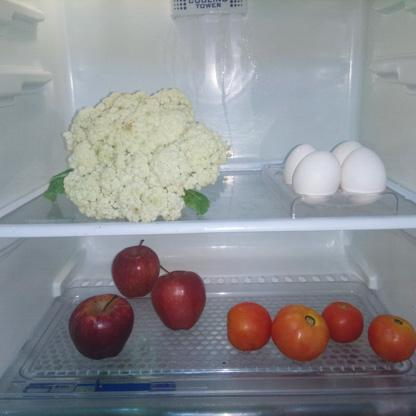

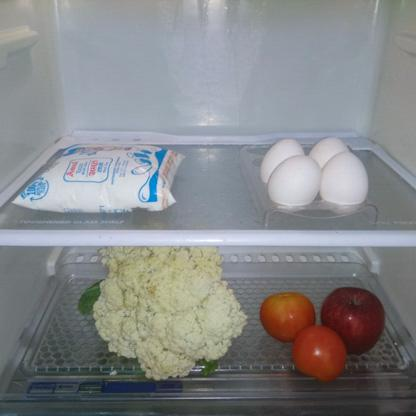

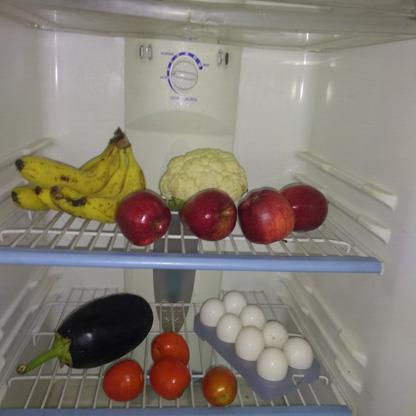

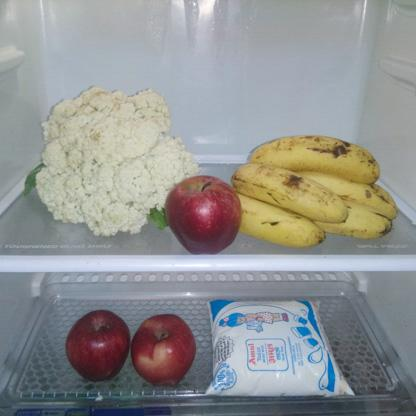

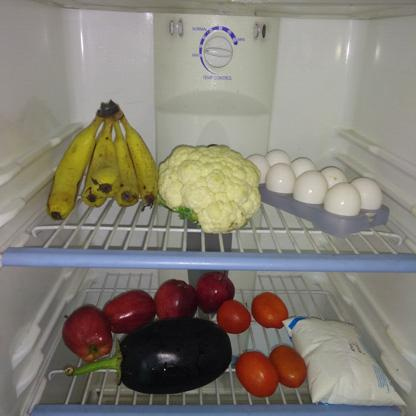

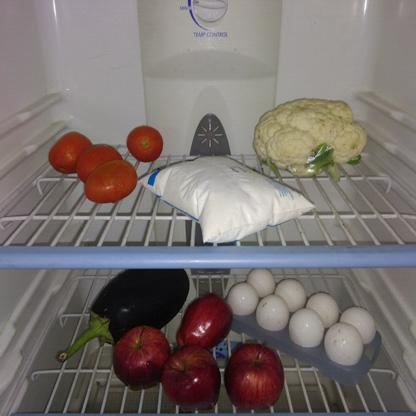

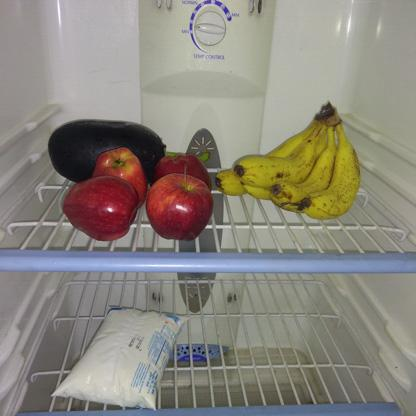

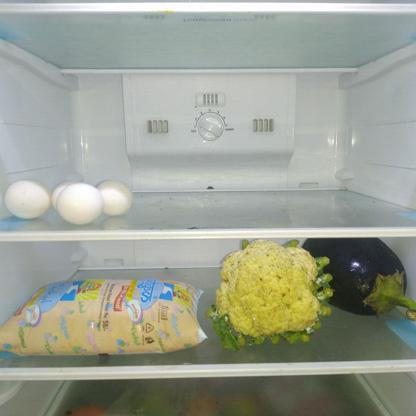

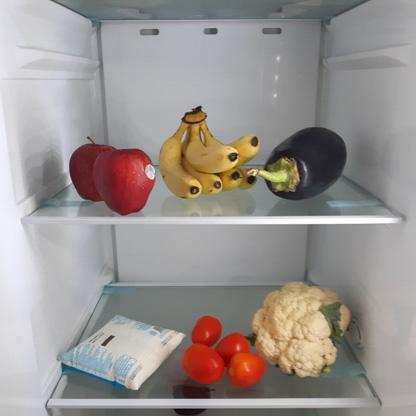

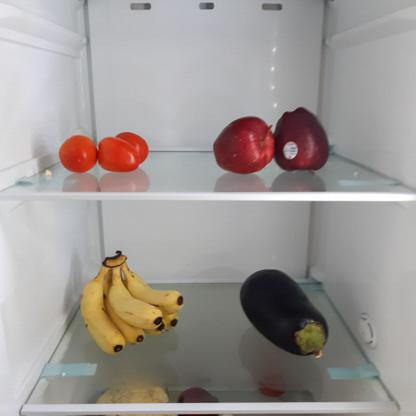

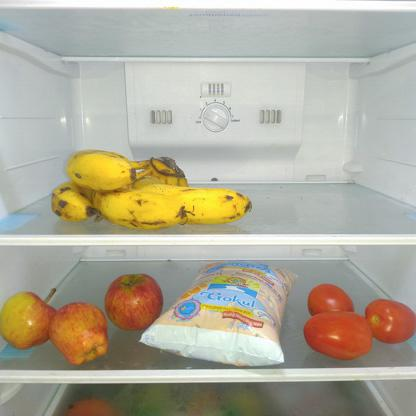

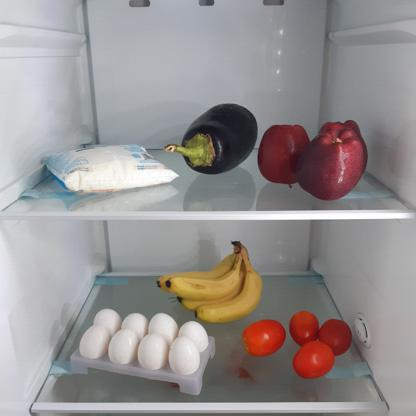

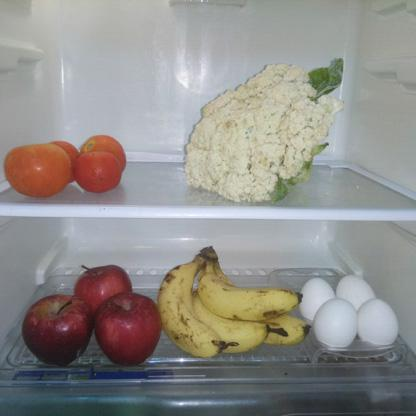

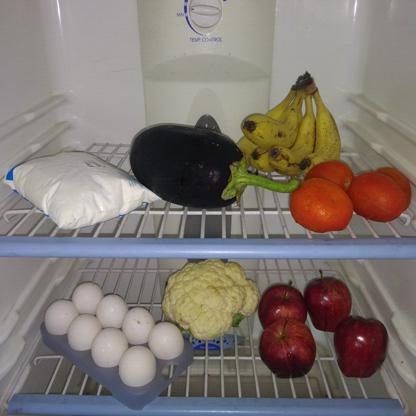

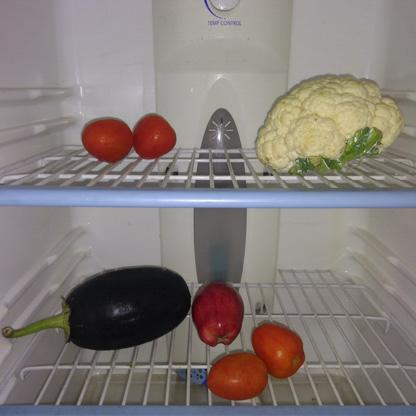

In [20]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('../test/images/*.jpg'): 
    display(Image(filename=imageName))
    print("\n")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d902bd05-540d-4e98-85f5-fe42473d81f7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>